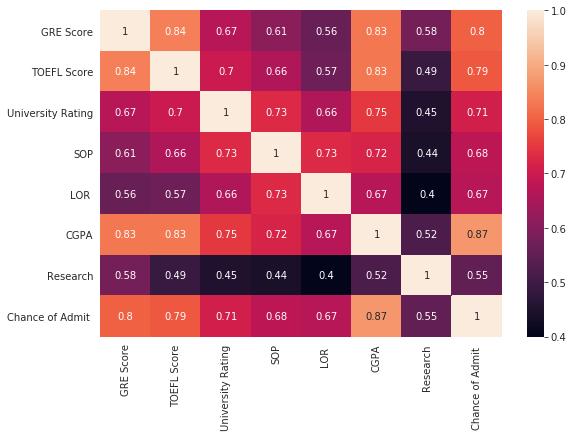

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split 

def test_model(model):
    global X_train, X_test, y_train, y_test 
    print('Error on test data:', mae(y_test, model.predict(X_test.reshape(-1,1))))
    print('Error on training data:', mae(y_train, model.predict(X_train.reshape(-1,1))))

sns.set({ 'figure.figsize': (9, 6) })

# Dataset is from: https://www.kaggle.com/mohansacharya/graduate-admissions
df = pd.read_csv('../input/Admission_Predict.csv').dropna()
del df['Serial No.']
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

After checking the relations between features, we are confident enough to say that the "GRE Score" feature is a good starting point.

In [2]:
X = df['CGPA'].values
y = df['Chance of Admit '].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)

Linear regression seems to be a good solution for this problem

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1, copy_X=True).fit(X_train.reshape(-1,1), y_train)
test_model(model)

Error on test data: 0.046833697677972554
Error on training data: 0.052984721444545586


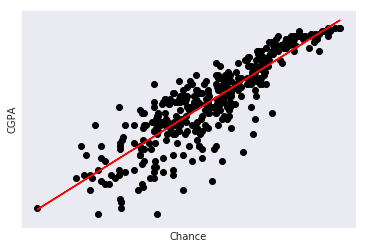

In [4]:
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X.reshape(-1,1)), color='red')
plt.xticks(())
plt.yticks(())
plt.xlabel('Chance')
plt.ylabel('CGPA')
plt.show()

Now, let's try something else.

In [5]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(learning_rate_init=.3,
                     max_iter=1000,
                     random_state=9,
                     hidden_layer_sizes=(500,))
model.fit(X_train.reshape(-1,1), y_train)
test_model(model)

Error on test data: 0.05733631224967595
Error on training data: 0.05823113563942353


In [6]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             min_samples_leaf=1,
                             min_impurity_decrease=0)
model.fit(X_train.reshape(-1,1), y_train)
test_model(model)

Error on test data: 0.061680555555555544
Error on training data: 0.03313571428571429


Conclusion: _Linear Regression is the best approximator for this problem according to me._